In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style = "whitegrid")

In [3]:
df = pd.read_csv("AIML Dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
round((df['isFraud'].value_counts()[1]/df.shape[0]) *100,2)

0.13

Text(0, 0.5, 'Count')

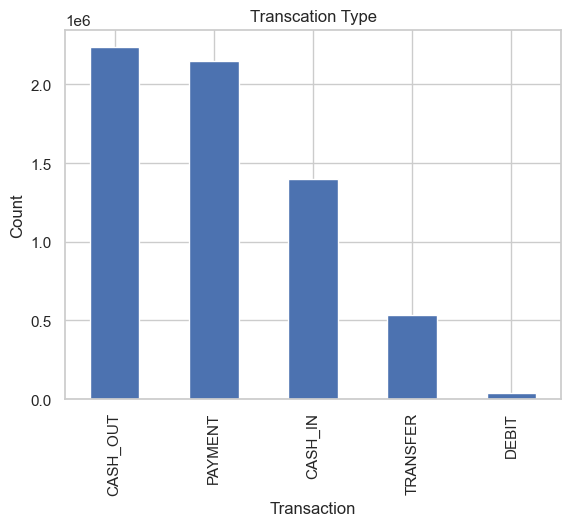

In [13]:
df['type'].value_counts().plot(kind = "bar",title="Transcation Type")
plt.xlabel('Transaction')
plt.ylabel("Count")

In [14]:
fraud_by_type = df.groupby("type")['isFraud'].mean().sort_values(ascending = False)

Text(0, 0.5, 'Fraud Rate')

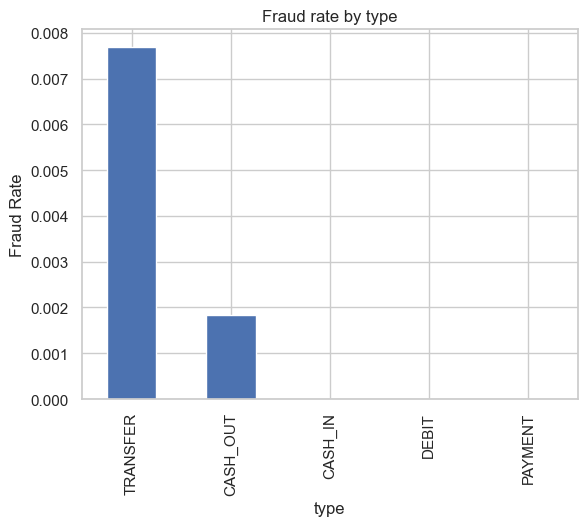

In [15]:
fraud_by_type.plot(kind = "bar",title = "Fraud rate by type")
plt.ylabel("Fraud Rate")

In [16]:
df['amount'].describe().astype("int")

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

<Axes: xlabel='amount', ylabel='Count'>

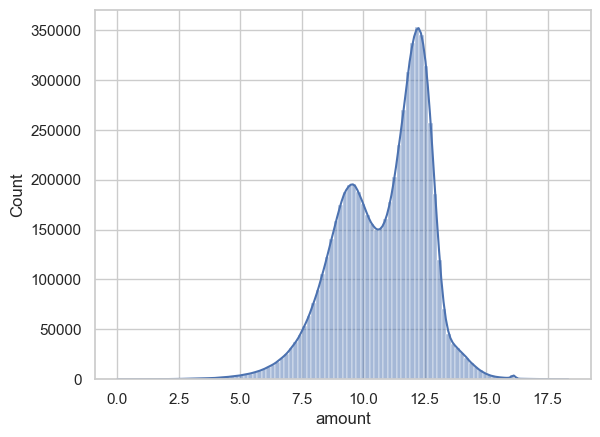

In [17]:
sns.histplot(np.log1p(df['amount']),bins = 100,kde = True)

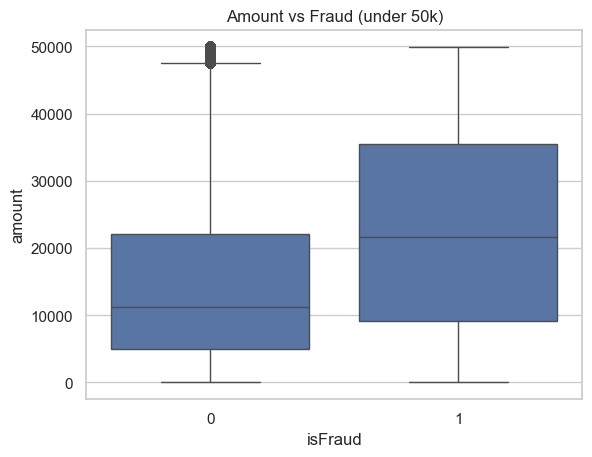

In [18]:
sns.boxplot(data = df[df['amount'] < 50000],x = 'isFraud',y = 'amount')
plt.title("Amount vs Fraud (under 50k)")
plt.show()

In [19]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [20]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [21]:
df['balanceDiffDest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [22]:
(df['balanceDiffOrig'] < 0).sum()

1399253

In [23]:
(df['balanceDiffDest'] < 0).sum()

2806464

Text(0.5, 1.0, 'Frauds over time')

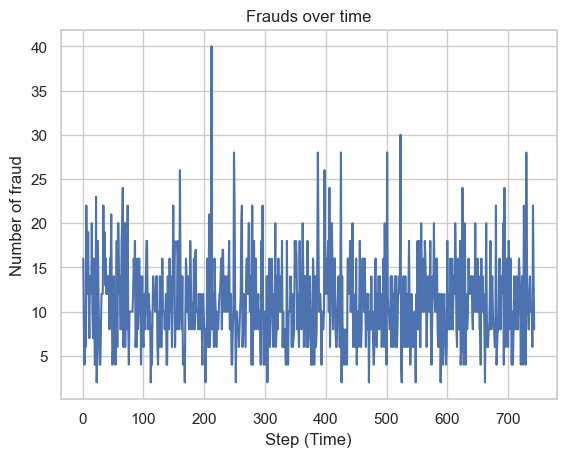

In [24]:
fraud_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index,fraud_per_step.values,label = 'fraud per step')
plt.xlabel("Step (Time)")
plt.ylabel("Number of fraud")
plt.title("Frauds over time")

In [25]:
df.drop(columns=['step'],inplace = True)

In [26]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [27]:
top_senders = df['nameOrig'].value_counts().head(10)

In [28]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [29]:
top_receivers = df['nameOrig'].value_counts().head(10)

In [30]:
top_receivers

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [31]:
fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)

In [32]:
fraud_types = df[df['type'].isin(['TRANSFER','CASH_OUT'])]

<Axes: xlabel='type', ylabel='count'>

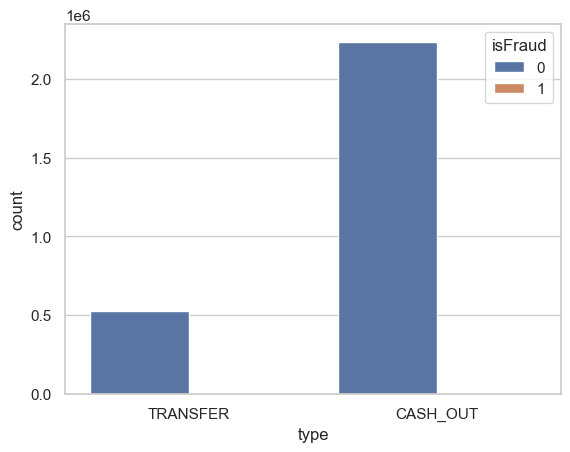

In [33]:
sns.countplot(data=fraud_types,x = "type",hue= "isFraud")

In [34]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

In [35]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0
1,1864.28,21249.00,19384.72,0.00,0.00,0
2,181.00,181.00,0.00,0.00,0.00,1
3,181.00,181.00,0.00,21182.00,0.00,1
4,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,850002.52,850002.52,0.00,0.00,0.00,1


In [39]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER','CASH_OUT']))
]

In [40]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


In [41]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

In [44]:
df_model = df.drop(columns = ["nameOrig","nameDest","isFlaggedFraud"],axis = 1)

In [45]:
df_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,-339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,-6311409.27
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00


In [62]:
categorical = ['type']
numerical = ["amount",	"oldbalanceOrg",	"newbalanceOrig",	"oldbalanceDest",	"newbalanceDest"]

In [63]:
y = df['isFraud']
X = df.drop("isFraud",axis = 1)

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y)

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numerical),
        ("cat",OneHotEncoder(drop = "first"),categorical)
    ],
    remainder="drop"
)

In [66]:
pipeline = Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [67]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [69]:
y_pred=pipeline.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [72]:
confusion_matrix(y_test,y_pred)

array([[1804629,  101693],
       [    142,    2322]])

In [73]:
pipeline.score(X_test,y_test)

0.9466493362797087

In [74]:
import joblib

In [75]:
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']

In [77]:
pipeline.predict(X_test)[0]

0